<a href="https://colab.research.google.com/github/SergiQa/Regresion-Lineal-Multiple/blob/main/Regresion_Lineal_Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Librerías Necesarias

In [180]:
import pandas as pd
import numpy as np
import statsmodels.api as sm # Estadísticas R Ajustado
import seaborn as sns  # Gráficos
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # Polinomial

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [181]:
df_train = pd.read_csv("https://raw.githubusercontent.com/SergiQa/Regresion-Lineal-Multiple/main/train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/SergiQa/Regresion-Lineal-Multiple/main/test.csv")
df_train

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
#Contando valores nulos
df_train.isnull().sum()

id           1080
date         1080
city         1080
lat          1131
long         1126
pop          1080
shop         1080
brand        1080
container    1096
capacity     1095
price        1080
quantity     1080
dtype: int64

In [183]:
#Quitando valores nulos (solo filas con todos los valores nulos)
df_train=df_train.dropna(how='all')

#Dimension de los nuevos datos
print("Observaciones y variables: ", df_train.shape)

Observaciones y variables:  (6480, 12)


In [184]:
#Contando valores nulos restantes
df_train.isnull().sum()

id            0
date          0
city          0
lat          51
long         46
pop           0
shop          0
brand         0
container    16
capacity     15
price         0
quantity      0
dtype: int64

In [185]:
#Quitando valores nulos restantes
df_train=df_train.dropna()

In [186]:
#Para la base test

#Quitando valores nulos
df_test=df_test.dropna()

In [187]:
#Describiendo las variables a considerar

#Variables nuumericas
df_train.iloc[:,2:12].describe()

,lat,long,pop,price,quantity
count,6376.000000,6376.000000,6376.000000,6376.000000,6376.000000
mean,38.301132,23.270238,354987.271330,1.190204,29416.483061
std,1.650131,1.086459,232713.309214,0.816109,17891.264214
min,35.327870,21.734440,134219.000000,0.110000,2953.000000
25%,37.962450,22.417610,141732.000000,0.610000,16439.750000
50%,38.244440,22.930860,257501.500000,0.920000,25180.000000
75%,39.636890,23.716220,665871.000000,1.500000,37804.000000
max,40.643610,25.143410,672130.000000,4.540000,145287.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


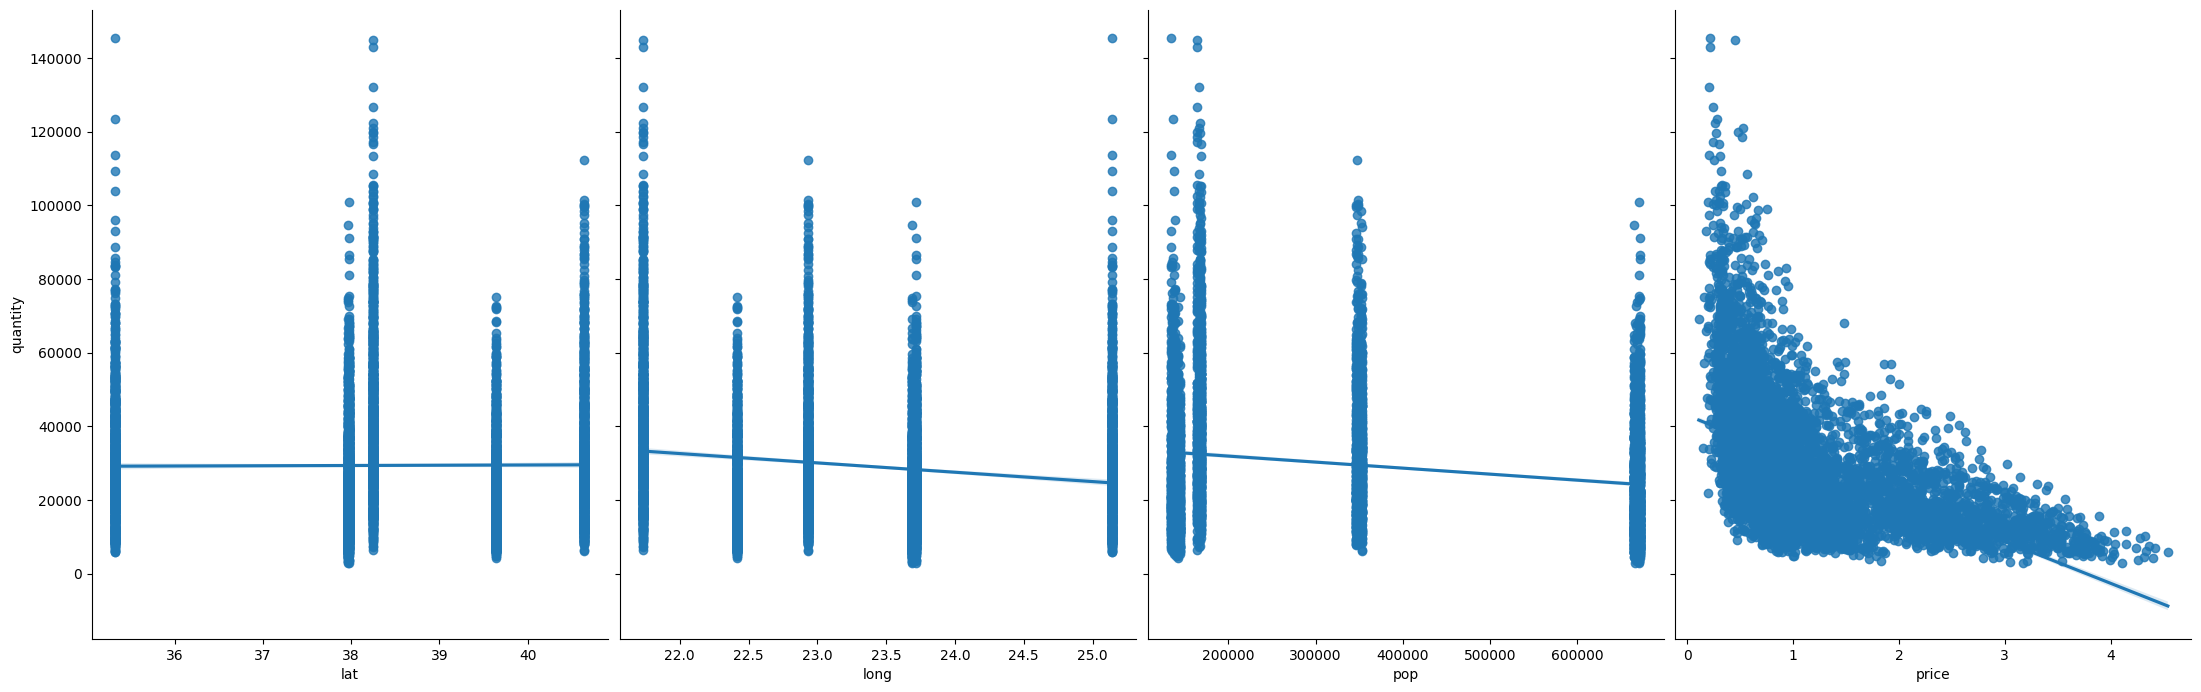

In [188]:
sns.pairplot(df_train, x_vars=['lat','long','pop', 'price'], y_vars='quantity', size=7, aspect=0.8,kind = 'reg')

(array([1721., 2352., 1291.,  608.,  235.,   93.,   52.,   12.,    8.,
           4.]),
 array([  2953. ,  17186.4,  31419.8,  45653.2,  59886.6,  74120. ,
         88353.4, 102586.8, 116820.2, 131053.6, 145287. ]),
 <BarContainer object of 10 artists>)

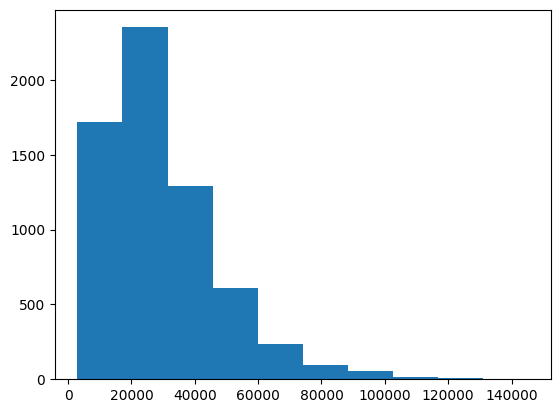

In [189]:
#Histograma de quantity
plt.hist(df_train['quantity'])

(array([  12.,   67.,  292.,  732., 1325., 1543., 1362.,  777.,  226.,
         40.]), array([ 7.99057688,  8.38016583,  8.76975478,  9.15934373,  9.54893268,
        9.93852163, 10.32811058, 10.71769953, 11.10728848, 11.49687743,
       11.88646638]), <BarContainer object of 10 artists>)


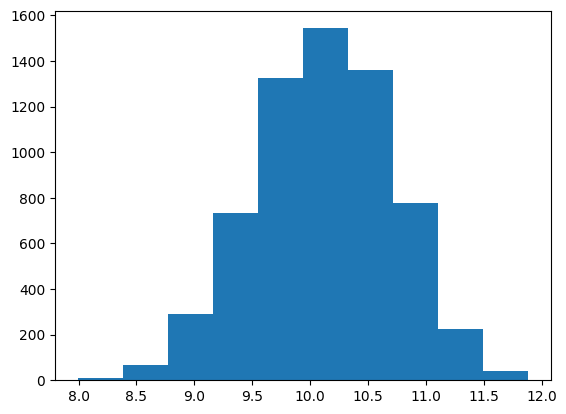

In [190]:
#Histograma de logaritmo de quantity
log_qua=np.log(df_train['quantity'])
print(plt.hist(log_qua))

In [191]:
#Variables Categoricas
var_cat_1 = df_train['city'].value_counts()
var_cat_2 = df_train['brand'].value_counts()
var_cat_3 = df_train['shop'].value_counts()
var_cat_4 = df_train['container'].value_counts()
var_cat_5 = df_train['capacity'].value_counts()

print(f"Frecuencia de City: \n{var_cat_1} \n\nFrecuencia de Brand: \n{var_cat_2} \n\nFrecuencia de Shop: \n{var_cat_3} \n\nFrecuencia de Container: \n{var_cat_4} \n\nFrecuencia de Capacity: \n{var_cat_5}")

Frecuencia de City: 
Athens          2122
Thessaloniki    1066
Patra           1065
Larisa          1062
Irakleion       1061
Name: city, dtype: int64 

Frecuencia de Brand: 
kinder-cola     1279
adult-cola      1277
lemon-boost     1277
gazoza          1275
orange-power    1268
Name: brand, dtype: int64 

Frecuencia de Shop: 
shop_4    1066
shop_6    1065
shop_5    1062
shop_1    1061
shop_2    1061
shop_3    1061
Name: shop, dtype: int64 

Frecuencia de Container: 
glass      2126
plastic    2125
can        2125
Name: container, dtype: int64 

Frecuencia de Capacity: 
500ml    2126
1.5lt    2125
330ml    2125
Name: capacity, dtype: int64


In [192]:
# Convertir la variables categóricas en variables dummy
df_train = pd.get_dummies(df_train, columns=['city','brand','shop','container','capacity'], drop_first=True)

#Para la base test
df_test = pd.get_dummies(df_test, columns=['city','brand','shop','container','capacity'], drop_first=True)

In [193]:
#Dimension del nuevo dataframe
print(df_train.shape)

(6376, 24)


In [194]:
#Declarando las variables
X_train=df_train.drop(columns=['id','date','quantity'])
Y_train=df_train['quantity']

X_test=df_test.drop(columns=['id','date','quantity'])
Y_test=df_test['quantity']

In [195]:
#Construccion del modelo
modelo_rm = LinearRegression()
modelo_rm.fit(X_train,Y_train)

LinearRegression()

In [196]:
print(modelo_rm.score(X_train,Y_train))

0.567177324556414


In [197]:
predicciones = modelo_rm.predict(X_test)
print(predicciones[:-1])

[ 1939.64578913 20492.41986619 26081.74094808 ... 23643.12396704
 36497.44360977 24505.52614175]


In [201]:
comparaciones = pd.DataFrame(Y_test)
comparaciones = comparaciones.assign(Predicho = predicciones.flatten().tolist())
print(comparaciones)

      quantity      Predicho
0         7056   1939.645789
1        12490  20492.419866
2        26640  26081.740948
3        41892  35100.919604
4        22923  33290.901841
...        ...           ...
1075     13760   6084.617024
1076     16309  23643.123967
1077     24378  36497.443610
1078     20691  24505.526142
1079     24615  28085.599479

[1058 rows x 2 columns]


In [203]:
print('Mean Squared Error: MSE', metrics.mean_squared_error(Y_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predicciones)))

Mean Squared Error: MSE 121585511.69896013
Root Mean Squared Error RMSE: 11026.582049708792
